# Hashing / Password Cracking Exercise

⚠️ **READ FIRST!** ⚠️

Before you run any cells, switch to GPU runtime.

Runtime -> Change Runtime type -> T4 GPU -> Save

## Set Up Your Hacker Environment

In [1]:
cd /content/

/content


In [2]:
!git clone https://github.com/OleMussmann/password_cracking.git

Cloning into 'password_cracking'...
remote: Enumerating objects: 32, done.
remote: Counting objects: 100% (32/32), done.
remote: Compressing objects: 100% (21/21), done.
remote: Total 32 (delta 9), reused 27 (delta 7), pack-reused 0
Receiving objects: 100% (32/32), 41.43 KiB | 1.59 MiB/s, done.
Resolving deltas: 100% (9/9), done.


In [3]:
cd password_cracking/

/content/password_cracking


In [4]:
!./setup.sh

--2023-11-14 12:08:28--  https://resources.oreilly.com/live-training/enhanced-machine-learning-for-cybersecurity/raw/master/Data/google-10000-english.txt
Resolving resources.oreilly.com (resources.oreilly.com)... 199.27.144.213, 199.27.144.212
Connecting to resources.oreilly.com (resources.oreilly.com)|199.27.144.213|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 75888 (74K) [text/plain]
Saving to: ‘google-10000-english.txt’

google-10000-englis 100%[===================>]  74.11K  --.-KB/s    in 0.1s    

2023-11-14 12:08:29 (502 KB/s) - ‘google-10000-english.txt’ saved [75888/75888]

--2023-11-14 12:08:29--  http://downloads.skullsecurity.org/passwords/rockyou.txt.bz2
Resolving downloads.skullsecurity.org (downloads.skullsecurity.org)... 45.79.105.227
Connecting to downloads.skullsecurity.org (downloads.skullsecurity.org)|45.79.105.227|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.skullsecurity.or

Check that the output of the above cell contains `Device type: GPU`. Otherwise the following calculations will take _much_ longer. If it doesn't run on GPU, please re-check that you have selected the GPU runtime.

## Assignment: Who is that Pokemon?

You're on your way to become a Pokémon Master, and so you want to unravel all secrets about Pokémon.
But like in every episode, even in this special episode of **Pokémon: ESTP Special**, you're confronted with the dreadful question: *Who is that Pokémon?*.

In this assignment, you're presented with the *hash* of a mystery Pokémon and a list of all 151 Pokémons from the original first generation. Find out what mystery Pokémon is hidden behind this hash in this episode of **Pokémon: ESTP Special**!

In [5]:
# ==============
# Notebook setup
# ==============

import os
from hashlib import sha256

mystery_pokemon = "989f9c3f8054c8ff71c8be644451f6e54fb8807615120de7c9d6e5e6e17a6bdc"

pokemons = ['bulbasaur', 'ivysaur', 'venusaur', 'charmander', 'charmeleon', 'charizard', 'squirtle', 'wartortle', 'blastoise', 'caterpie', 'metapod', 'butterfree', 'weedle', 'kakuna', 'beedrill', 'pidgey', 'pidgeotto', 'pidgeot', 'rattata', 'raticate', 'spearow', 'fearow', 'ekans', 'arbok', 'pikachu', 'raichu', 'sandshrew', 'sandslash', 'nidoran_f', 'nidorina', 'nidoqueen', 'nidoran_m', 'nidorino', 'nidoking', 'clefairy', 'clefable', 'vulpix', 'ninetales', 'jigglypuff', 'wigglytuff', 'zubat', 'golbat', 'oddish', 'gloom', 'vileplume', 'paras', 'parasect', 'venonat', 'venomoth', 'diglett', 'dugtrio', 'meowth', 'persian', 'psyduck', 'golduck', 'mankey', 'primeape', 'growlithe', 'arcanine', 'poliwag', 'poliwhirl', 'poliwrath', 'abra', 'kadabra', 'alakazam', 'machop', 'machoke', 'machamp', 'bellsprout', 'weepinbell', 'victreebel', 'tentacool', 'tentacruel', 'geodude', 'graveler', 'golem', 'ponyta', 'rapidash', 'slowpoke', 'slowbro', 'magnemite', 'magneton', "farfetch'd", 'doduo', 'dodrio', 'seel', 'dewgong', 'grimer', 'muk', 'shellder', 'cloyster', 'gastly', 'haunter', 'gengar', 'onix', 'drowzee', 'hypno', 'krabby', 'kingler', 'voltorb', 'electrode', 'exeggcute', 'exeggutor', 'cubone', 'marowak', 'hitmonlee', 'hitmonchan', 'lickitung', 'koffing', 'weezing', 'rhyhorn', 'rhydon', 'chansey', 'tangela', 'kangaskhan', 'horsea', 'seadra', 'goldeen', 'seaking', 'staryu', 'starmie', 'mr.mime', 'scyther', 'jynx', 'electabuzz', 'magmar', 'pinsir', 'tauros', 'magikarp', 'gyarados', 'lapras', 'ditto', 'eevee', 'vaporeon', 'jolteon', 'flareon', 'porygon', 'omanyte', 'omastar', 'kabuto', 'kabutops', 'aerodactyl', 'snorlax', 'articuno', 'zapdos', 'moltres', 'dratini', 'dragonair', 'dragonite', 'mewtwo', 'mew']

Variable `mystery_pokemon` stores the *hash* of the mystery Pokémon. The hash

*   List item
*   List item

function that was used is the SHA-256 algorithm.

*Find out which Pokémon belongs to this hash value!*

In [6]:
mystery_pokemon

'989f9c3f8054c8ff71c8be644451f6e54fb8807615120de7c9d6e5e6e17a6bdc'

Variable `pokemons` stores the complete list of all 151 Pokémons of generation 1. The first 10 pokemons of the list are shown below.

In [7]:
pokemons[:10]

['bulbasaur',
 'ivysaur',
 'venusaur',
 'charmander',
 'charmeleon',
 'charizard',
 'squirtle',
 'wartortle',
 'blastoise',
 'caterpie']

The function `hash_256` below features the `sha_256` algorithm.
Use it to hash any string (or Pokémon) you like as shown with the print statement.

In [8]:
def hash_256(x):
  ret = x.encode("ascii")
  ret = sha256(ret)
  ret = ret.hexdigest()
  return ret

print(hash_256("pikachu"))

43999461d22f67840fcd9b8824293eaa4f18146e57b2c651bcd925e3b3e4e429


## Exercise 1
Now that you're presented with the full list of all Pokémons in `pokemons` and a hash function `hash_256` to hash a string, find the name of the hashed mystery Pokémon in the code segment below. Call an instructor to verify your answer if you've found the Pokémon!

In [ ]:
######################
# Enter your code here
#####################)

## Exercise 2

Oh no, your friend Janelle got hacked on her PC! It turns out that her password to her Pokémon box ``pikachu7`` wasn't safe enough... Since then, she has created a new password but you're not sure about the safety of her password. Try to figure out what her password is from its hash! (Hint: her favorite number is ``7``)

In [9]:
password_janelle = "482cf0370632b31636f93e18fa7a455a1c6520c1f152bc4ce25ebb69b11b45f3"

In [ ]:
######################
# Enter your code here
######################

# GPU-Assisted Password Cracking

Now we channel our inner hacker and leverage the massively parallel capabilities of a GPU to crack passwords at scale. Google Colab can attach a GPU to the runtime of this notebook. So put on your black hoodie and let's go!

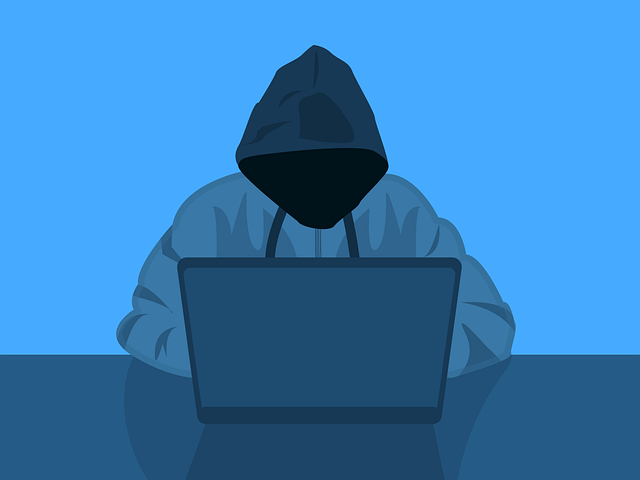

## Crack passwords

Run the following cell for **5 mins** and then cancel it by clicking on the square button on its left. This will use a generic standard approach to find passwords:


1.   Try a list of most-used passwords
2.   Try random characters

Note that variations like appending numbers or replacing characters (changing O to 0, 1 to !, S to $) can be done automatically. The output will contain cracked passwords and their username like so:
```
password    (username)
```




In [10]:
!$(pwd)/john/run/john --format=opencl passwd.txt

Device 1: Tesla T4
Using default input encoding: UTF-8
Loaded 22 password hashes with 22 different salts (md5crypt-opencl, crypt(3) $1$ [MD5 OpenCL])
/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/ -\|/ -\|/ -\|/ -\|/ -\|/-\|/-\| LWS=32 GWS=327680 (10240 blocks) 
Proceeding with single, rules:Single
 Press Ctrl-C to abort, or send SIGUSR1 to john process for status
Almost done: Processing the remaining buffered candidate passwords, if any.
frankfrank       (frank)     
louis1987        (louis)     
Further messages of this type will be suppressed.
2g 0:00:00:00 DONE 1/3 (2023-11-14 12:20) 18.18g/s 174118p/s 320890c/s 320890C/s victor..louis1987
Proceeding with wordlist:/content/password_cracking/john/run/password.lst
 Enabling duplicate candidate password suppressor
Pa$$w0rd         (heidi)     
12345            (alice)     
Device 1 prob

Next we try the **rockyou.txt** wordlist. The company RockYou used to store user passwords unencrypted, got hacked and had the passwords leaked, see https://en.wikipedia.org/wiki/RockYou#Data_breach. While bad for the users, this incident gave researchers valuable insight in real-world password usage.

In [ ]:
!$(pwd)/john/run/john --wordlist=word_files/rockyou.txt --format=opencl passwd.txt

Device 1: Tesla T4
Using default input encoding: UTF-8
Loaded 22 password hashes with 22 different salts (md5crypt-opencl, crypt(3) $1$ [MD5 OpenCL])
Cracked 10 password hashes (are in /content/password_cracking/john/run/john.pot), use "--show"
Remaining 12 password hashes with 12 different salts
/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/ -\|/ -\|/ -\|/ -\|/ -\|/-\|/-\| LWS=32 GWS=327680 (10240 blocks) 
 Press Ctrl-C to abort, or send SIGUSR1 to john process for status
Device 1 probably invalid temp reading (-1°C).
!@#$1234qwer     (charlie)     
1g 0:00:00:34 DONE (2023-11-14 10:56) 0g/s 404708p/s 4527Kc/s 4527KC/s #1boricua!..*7¡Vamos!
Use the "--show" option to display all of the cracked passwords reliably
Session completed. 


Let's try some more known passwords. The synthetic dataset **email_phished.txt** is a made-up list of passwords that could have been phished via email. See: https://en.wikipedia.org/wiki/Phishing

In [11]:
!$(pwd)/john/run/john --wordlist=word_files/email_phished.txt --format=opencl passwd.txt

Device 1: Tesla T4
Using default input encoding: UTF-8
Loaded 22 password hashes with 22 different salts (md5crypt-opencl, crypt(3) $1$ [MD5 OpenCL])
Cracked 2 password hashes (are in /content/password_cracking/john/run/john.pot), use "--show"
Remaining 20 password hashes with 20 different salts
/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/ -\|/ -\|/ -\|/ -\|/ -\|/-\|/-\| LWS=32 GWS=163840 (5120 blocks) 
 Press Ctrl-C to abort, or send SIGUSR1 to john process for status
F(t7eh#qtzC!7    (klaus)     
1g 0:00:00:00 DONE (2023-11-14 12:20) 16.67g/s 66.67p/s 1333c/s 1333C/s uiaedtn..toast
Use the "--show" option to display all of the cracked passwords reliably
Session completed. 


Re-using passwords is very, *very* bad practise. Is any of our users re-using passwords that were leaked from this (fictive) webshop?

In [ ]:
!$(pwd)/john/run/john --wordlist=word_files/webshop_leak.txt --format=opencl passwd.txt

Device 1: Tesla T4
Using default input encoding: UTF-8
Loaded 22 password hashes with 22 different salts (md5crypt-opencl, crypt(3) $1$ [MD5 OpenCL])
Cracked 12 password hashes (are in /content/password_cracking/john/run/john.pot), use "--show"
Remaining 10 password hashes with 10 different salts
/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/ -\|/ -\|/ -\|/ -\|/ -\|/-\|/-\| LWS=32 GWS=163840 (5120 blocks) 
 Press Ctrl-C to abort, or send SIGUSR1 to john process for status
]Zal:zyl;+Ig     (mike)     
1g 0:00:00:00 DONE (2023-11-14 10:56) 33.33g/s 133.3p/s 1333c/s 1333C/s O>iw#yakh0L8..]Zal:zyl;+Ig
Use the "--show" option to display all of the cracked passwords reliably
Session completed. 


Some people recommend using a random combination of words as passwords. Is this good advice?

During the setup at the beginning of the notebook, we downloaded a dictionary of the 10000 most used words in the English language - **google-10000-english.txt**. For demonstrational purposes, we shortened that list to 1500 words and 100 words, respectively. The **combine.py** script concatenates N different words from a given word file. We pipe these into the password cracking program.

Let's start with two words from the top 1500 list.

In [ ]:
!./combine.py 2 word_files/google-1500-english.txt | $(pwd)/john/run/john --format=opencl -stdin passwd.txt

Device 1: Tesla T4
Using default input encoding: UTF-8
Loaded 22 password hashes with 22 different salts (md5crypt-opencl, crypt(3) $1$ [MD5 OpenCL])
Cracked 13 password hashes (are in /content/password_cracking/john/run/john.pot), use "--show"
Remaining 9 password hashes with 9 different salts
/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/ -\|/ -\|/ -\|/ -\|/ -\|/-\|/-\| LWS=32 GWS=327680 (10240 blocks) 
 Press Ctrl-C to abort, or send SIGUSR1 to john process for status
Device 1 probably invalid temp reading (-1°C).
supersecure      (erin)     
1g 0:00:00:04  0g/s 405120p/s 3634Kc/s 3634KC/s insteaddisease..photographyvan
Use the "--show" option to display all of the cracked passwords reliably
Session completed. 


And combining four words from the top 100 list.

In [ ]:
!./combine.py 4 word_files/google-100-english.txt | $(pwd)/john/run/john --format=opencl -stdin passwd.txt

Device 1: Tesla T4
Using default input encoding: UTF-8
Loaded 22 password hashes with 22 different salts (md5crypt-opencl, crypt(3) $1$ [MD5 OpenCL])
Cracked 14 password hashes (are in /content/password_cracking/john/run/john.pot), use "--show"
Remaining 8 password hashes with 8 different salts
/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/ -\|/ -\|/ -\|/ -\|/ -\|/-\|/-\| LWS=32 GWS=163840 (5120 blocks) 
 Press Ctrl-C to abort, or send SIGUSR1 to john process for status
Device 1 probably invalid temp reading (-1°C).
getthishomenow   (petra)     
Traceback (most recent call last):
  File "/content/password_cracking/./combine.py", line 19, in <module>
    print(combined)
KeyboardInterrupt
1g 0:00:02:57  0g/s 419865p/s 3273Kc/s 3273KC/s thanmaypagetime..thanviewhashave
Use the "--show" option to display all of the cracked passwords reliably


We can also check for specific patterns, like using numbers only. This drastically shrinks the parameter space we have to try. Cancel this cell after 5 mins or one match.

In [ ]:
!$(pwd)/john/run/john --incremental:digits --format=opencl passwd.txt

Device 1: Tesla T4
Using default input encoding: UTF-8
Loaded 22 password hashes with 22 different salts (md5crypt-opencl, crypt(3) $1$ [MD5 OpenCL])
Cracked 15 password hashes (are in /content/password_cracking/john/run/john.pot), use "--show"
Remaining 7 password hashes with 7 different salts
/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\| /-\|/-\| /-\|/-\| /-\|/-\| /-\|/-\| /-\|/-\|/-\| LWS=32 GWS=163840 (5120 blocks) 
 Press Ctrl-C to abort, or send SIGUSR1 to john process for status
Device 1 probably invalid temp reading (-1°C).
13467354         (judy)     
1g 0:00:00:34  0g/s 1224Kp/s 8358Kc/s 8358KC/s 06088075..99059046
Use the "--show" option to display all of the cracked passwords reliably
Session aborted


Once we run out of ideas, we can brute-force passwords by trying a certain number of completely random characters. We start with three. Write down the runtime of this cell and compare it to the following ones. How much longer does it take once we add one more character?

You will realize that completely random characters are significantly harder to crack than the passwords we found out above.

In [ ]:
!$(pwd)/john/run/john --incremental:Short3 --format=opencl passwd.txt

Device 1: Tesla T4
Using default input encoding: UTF-8
Loaded 22 password hashes with 22 different salts (md5crypt-opencl, crypt(3) $1$ [MD5 OpenCL])
Cracked 16 password hashes (are in /content/password_cracking/john/run/john.pot), use "--show"
Remaining 6 password hashes with 6 different salts
/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\ |/-\|/-\|/-\|/-\|/- \|/-\|/-\|/-\|/-\|/ -\|/-\|/-\|/-\|/-\| /-\|/-\|/-\|/-\|/-\ |/-\|/-\|/-\ LWS=32 GWS=163840 (5120 blocks) 
 Press Ctrl-C to abort, or send SIGUSR1 to john process for status
'f_              (tara)     
1g 0:00:00:00 N/A 1.124g/s 973591p/s 5420Kc/s 5420KC/s }WR..|||
Use the "--show" option to display all of the cracked passwords reliably
Session completed. 


Next up is four characters...

In [ ]:
!$(pwd)/john/run/john --incremental:Short4 --format=opencl passwd.txt

Device 1: Tesla T4
Using default input encoding: UTF-8
Loaded 22 password hashes with 22 different salts (md5crypt-opencl, crypt(3) $1$ [MD5 OpenCL])
Cracked 17 password hashes (are in /content/password_cracking/john/run/john.pot), use "--show"
Remaining 5 password hashes with 5 different salts
/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\ |/-\|/-\|/-\|/-\|/ -\|/-\|/-\|/-\|/-\ |/-\|/-\|/-\|/-\|/ -\|/-\|/-\|/-\|/-\ |/-\|/-\|/- LWS=32 GWS=163840 (5120 blocks) 
 Press Ctrl-C to abort, or send SIGUSR1 to john process for status
Device 1 probably invalid temp reading (-1°C).
6p]O             (otto)     
1g 0:00:00:39 DONE (2023-11-14 11:01) 0g/s 2061Kp/s 9235Kc/s 9235KC/s ^AT|..||||
Use the "--show" option to display all of the cracked passwords reliably
Session completed. 


... and five characters. After you find one password with this method, cancel the run by clicking on the square button on the left of that cell. Warning: this might take more than an hour. Grab a coffee, work on something else in the meantime. Check back here every 15 mins.

In [ ]:
!$(pwd)/john/run/john --incremental:Short5 --format=opencl passwd.txt

Six characters is next. The runtime might terminate before you can find a password hash. Free, online GPU time has it's limits. Feel free to skip this cell or try to crack it locally on your own hardware.

In [ ]:
!$(pwd)/john/run/john --incremental:Short6 --format=opencl passwd.txt

Cracking seven random characters will probably not work in this environment anymore. Give it a shot if you feel adventurous and have a lot of time on your hands, or just believe me it would take a long time in this online notebook. For more powerful hardware, however, this will be a matter of seconds.

In [ ]:
!$(pwd)/john/run/john --incremental:Short7 --format=opencl passwd.txt

Let's review which user's passwords we could crack easily on (as good as) no-cost hardware. Check above with which approach you cracked these. What mistakes were made? What would you advise to change?

In [ ]:
!$(pwd)/john/run/john --show passwd.txt

alice:12345
bob:samsucks
charlie:!@#$1234qwer
erin:supersecure
frank:frankfrank
grace:!QAZ2wsx
heidi:Pa$$w0rd
judy:13467354
klaus:F(t7eh#qtzC!7
louis:louis1987
mike:]Zal:zyl;+Ig
nils:
otto:6p]O
petra:getthishomenow
quincy:1qaz!QAZ
rick:^YHN7ujm
tara:'f_
victor:password9

18 password hashes cracked, 4 left


Check out this [password cracking chart](https://i.imgur.com/e3mGIFY.png) made by Reddit user *u/HelmedHorror*. It gives a good impression of password length vs. effort to crack. This Google notebook can manage a few 100,000,000 password hasher per second, using the GPU runtime. Serious attackers have hardware many orders of magnitude faster at their disposal. And as time goes by, this hardware will get more affordable and more powerful.